In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [42]:
data = pd.read_csv('/Users/cenkerarin/ml_test/datasets/diabetes.csv')

In [43]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

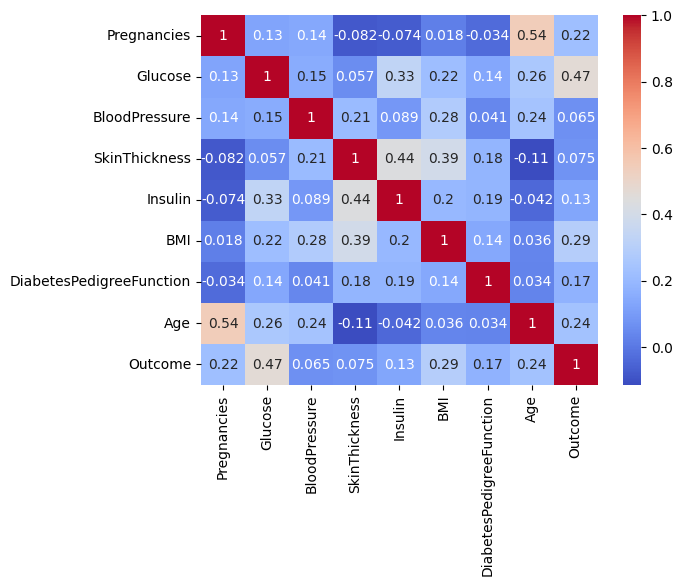

In [44]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Outcome', ylabel='count'>

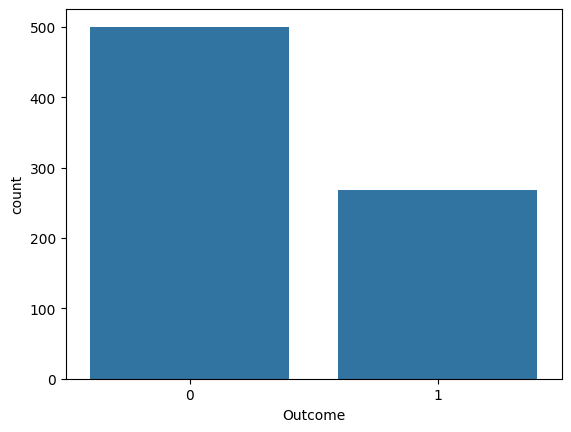

In [45]:
sns.countplot(x='Outcome', data=data)

<Axes: xlabel='Outcome', ylabel='count'>

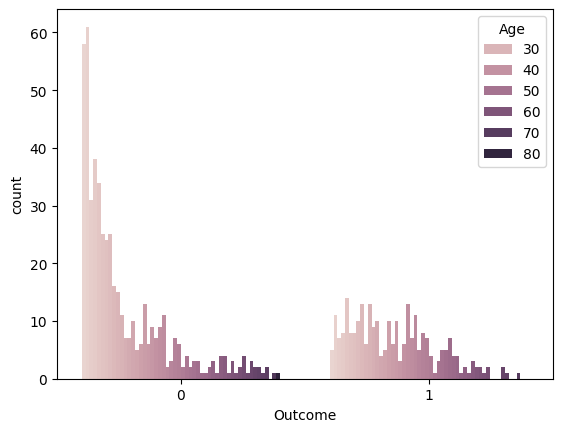

In [46]:
sns.countplot(x='Outcome', hue='Age', data=data)

<Axes: xlabel='Age', ylabel='Count'>

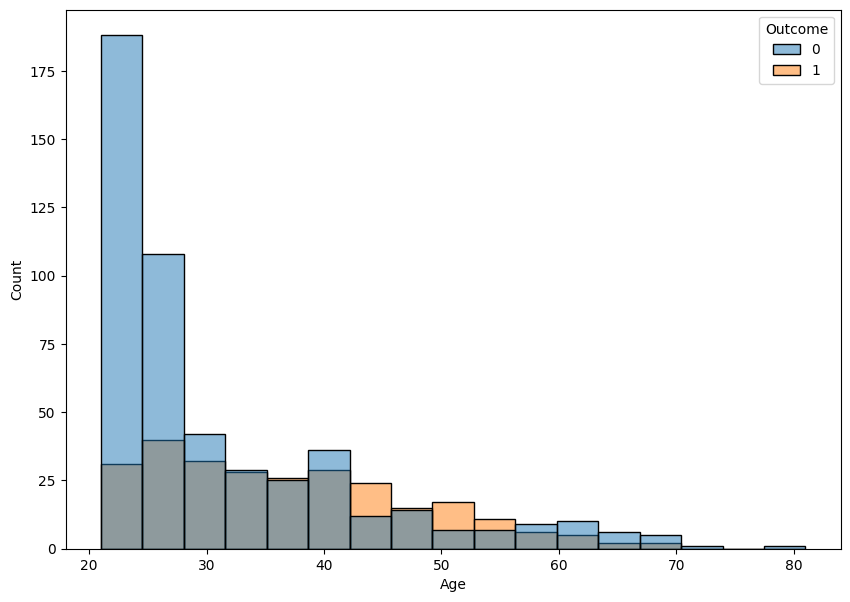

In [47]:
plt.figure(figsize=(10, 7))
sns.histplot(x='Age',hue="Outcome", data=data)

<Axes: xlabel='Glucose', ylabel='Count'>

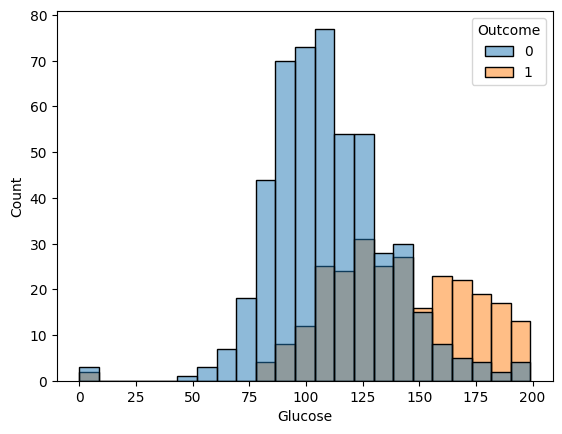

In [48]:
sns.histplot(x="Glucose",hue="Outcome" ,data=data)

<Axes: xlabel='SkinThickness', ylabel='Count'>

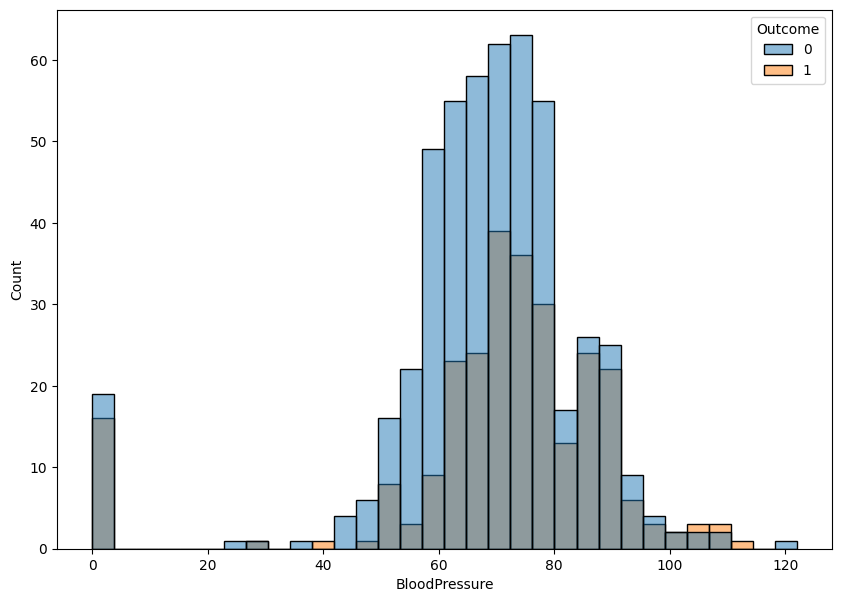

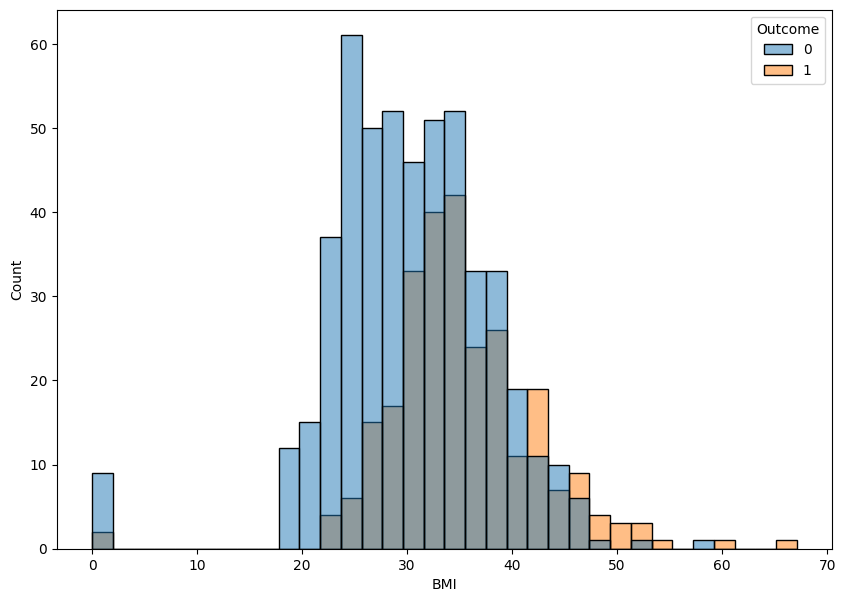

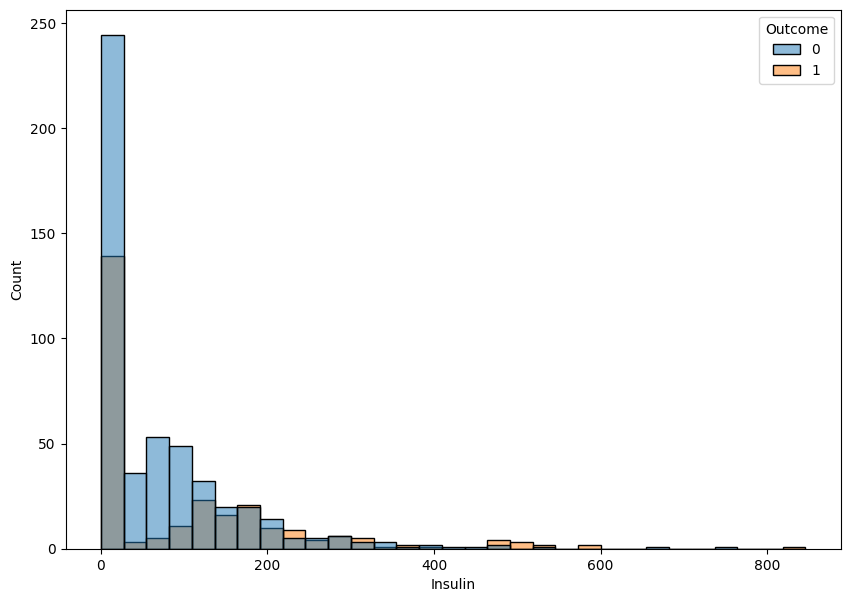

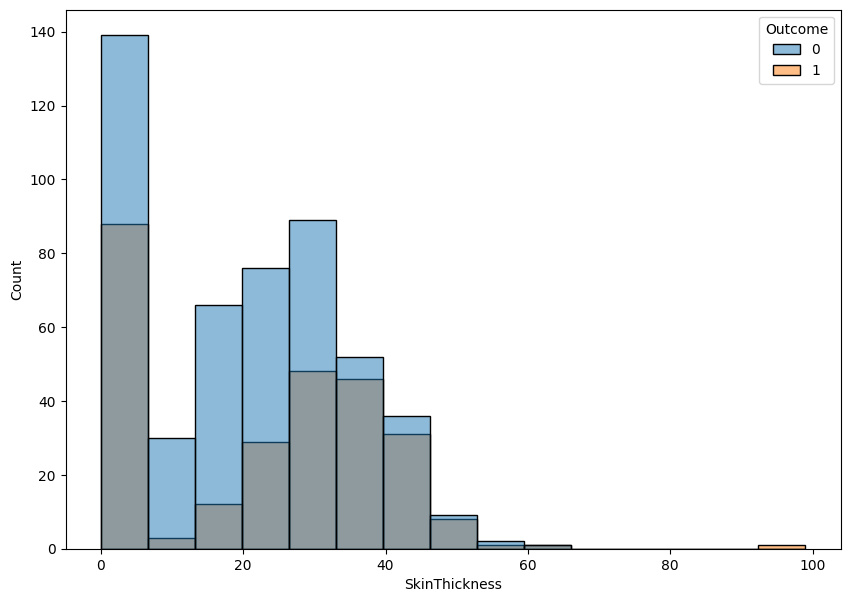

In [49]:
plt.figure(figsize=(10, 7))
sns.histplot(x='BloodPressure',hue="Outcome", data=data)
plt.figure(figsize=(10, 7))
sns.histplot(x='BMI',hue="Outcome", data=data)
plt.figure(figsize=(10, 7))
sns.histplot(x='Insulin',hue="Outcome", data=data)
plt.figure(figsize=(10, 7))
sns.histplot(x='SkinThickness',hue="Outcome", data=data)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

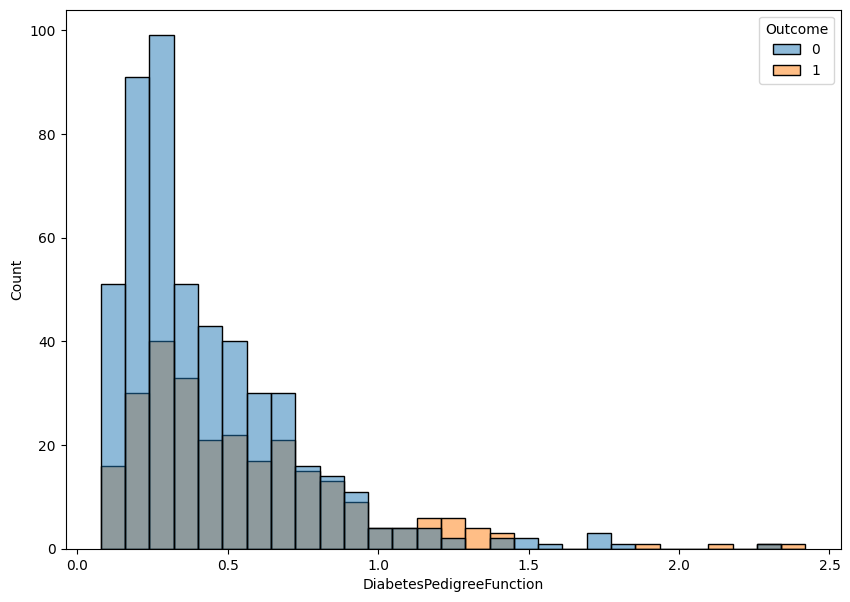

In [50]:
plt.figure(figsize=(10, 7))
sns.histplot(x='DiabetesPedigreeFunction',hue="Outcome", data=data)

highly right skewed dataset, as we will use logistic reg, we need to scale them

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
columns_to_scale = ['Age', 'Insulin', 'SkinThickness','DiabetesPedigreeFunction']

In [53]:
for col in columns_to_scale:
    # Add 1 to avoid log(0) issues and apply log transformation
    data[col] = np.log1p(data[col])

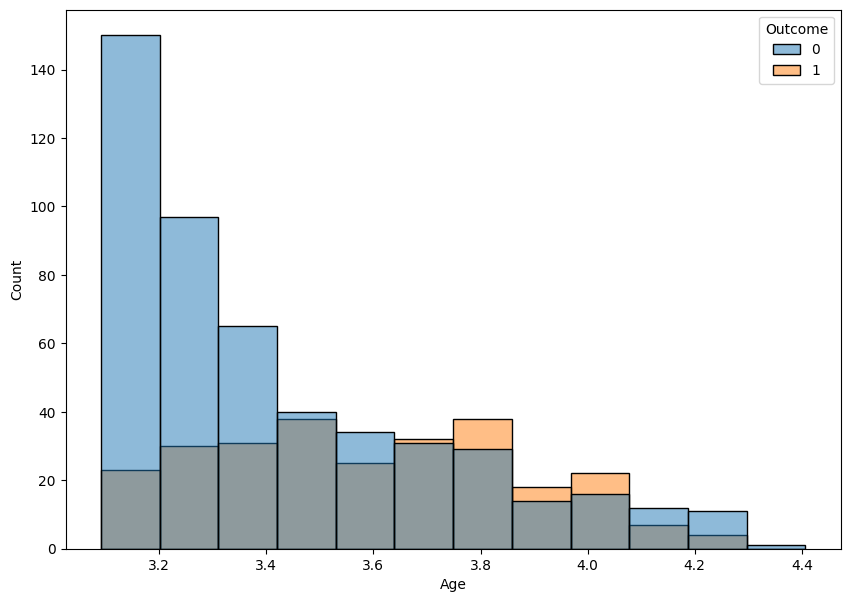

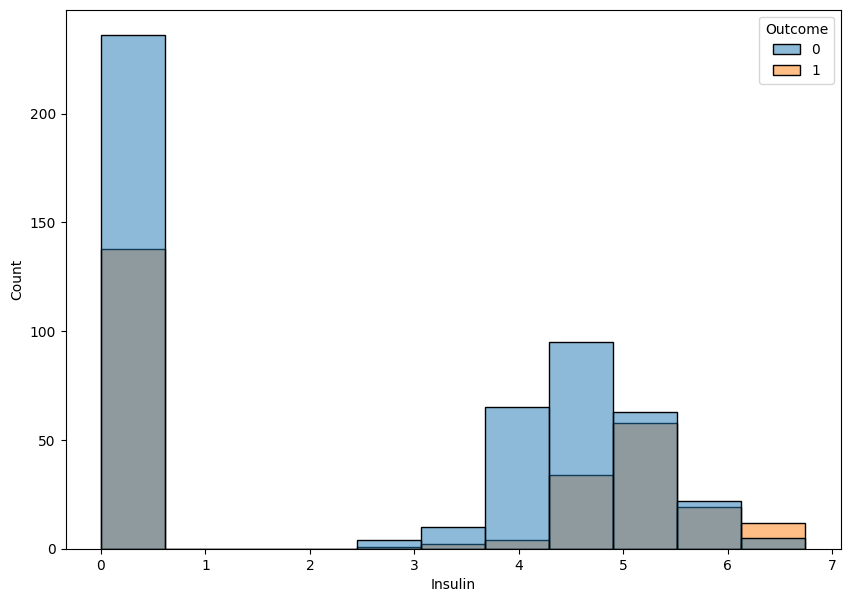

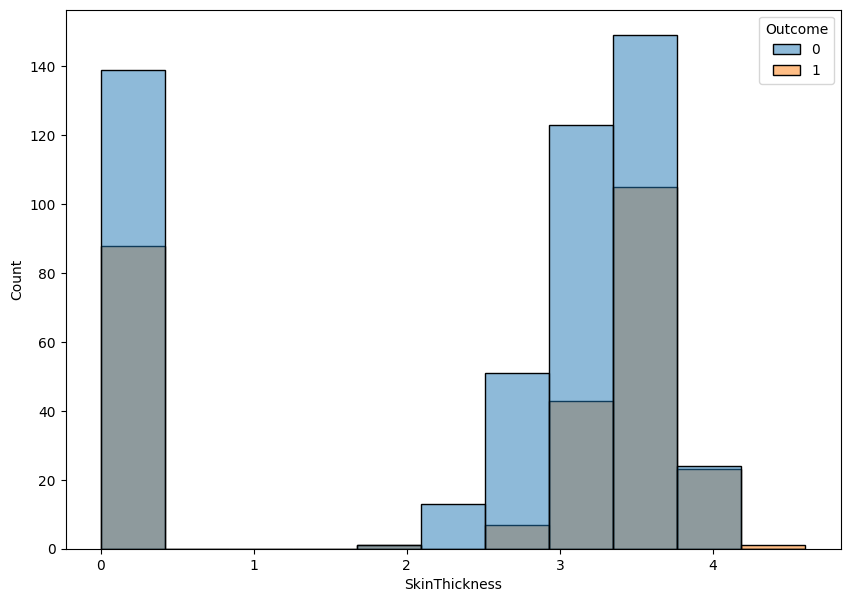

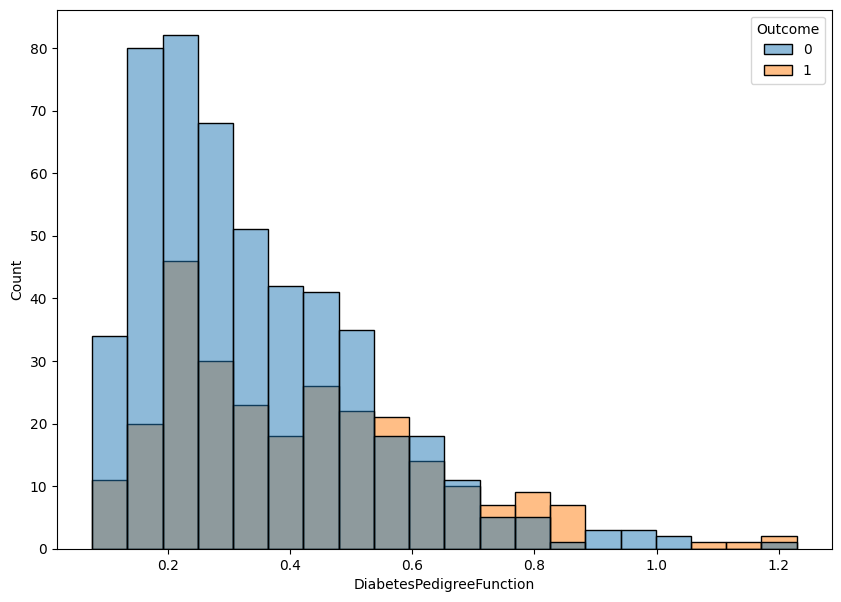

In [54]:
for col in columns_to_scale:
    plt.figure(figsize=(10, 7))
    sns.histplot(x=col,hue="Outcome", data=data)

In [55]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(x_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy: 0.7597

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



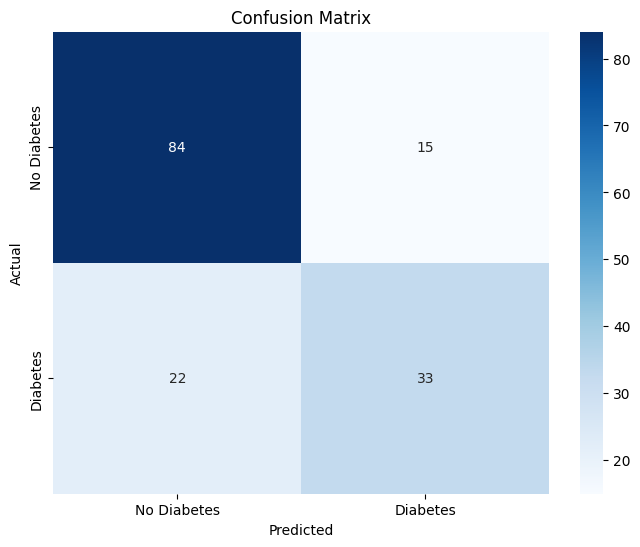

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions
y_pred = svm_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
